In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("/gdrive/MyDrive/datascience_assigment_parallel_score/assessment.csv")

In [ ]:
df.head()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1287,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,1119,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity


In [ ]:
df = df.dropna()

We will be working with only numerical coluns for the customer segmentation - Channel, TotalTransactionAmount, Tx_Count and DaysSinceLastTrans. 

In [ ]:
data = df[["Channel", "TotalTransactionAmount",	"Tx_Count",	"DaysSinceLastTrans"]]
data.head()

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
0,8.0,532700,137,30
1,1.0,1635552,131,30
2,8.0,548300,114,30
3,2.0,12200,13,30
4,8.0,211700,75,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 2634
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Channel                 2454 non-null   float64
 1   TotalTransactionAmount  2454 non-null   int64  
 2   Tx_Count                2454 non-null   int64  
 3   DaysSinceLastTrans      2454 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 95.9 KB


In [ ]:
data.isnull().sum()

Channel                   0
TotalTransactionAmount    0
Tx_Count                  0
DaysSinceLastTrans        0
dtype: int64

In [ ]:
# drop null values

data = data.dropna()

In [ ]:
# feature scale the values

norm = MinMaxScaler().fit(data)

# transform the data
scaled_data = norm.transform(data)

In [ ]:
scaled_data

array([[7.77777778e-01, 2.55255986e-02, 2.92284548e-03, 0.00000000e+00],
       [0.00000000e+00, 7.83714973e-02, 2.79389641e-03, 0.00000000e+00],
       [7.77777778e-01, 2.62731114e-02, 2.42854073e-03, 0.00000000e+00],
       ...,
       [7.77777778e-01, 9.53558034e-06, 0.00000000e+00, 5.20000000e-01],
       [7.77777778e-01, 4.31209485e-04, 1.71932087e-04, 5.20000000e-01],
       [0.00000000e+00, 4.74383143e-06, 0.00000000e+00, 5.60000000e-01]])

**##Building the clustering model**

Text(0, 0.5, 'Inertia')

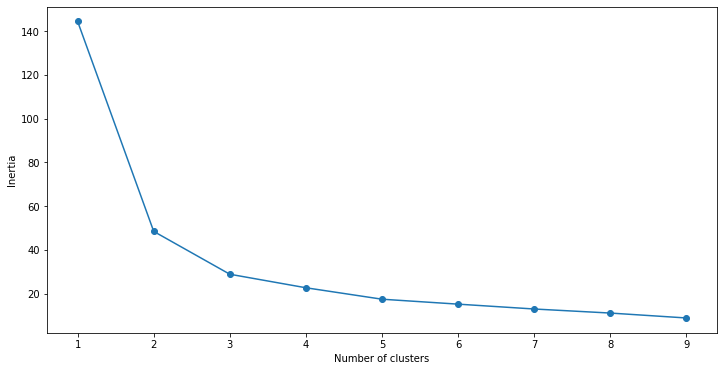

In [ ]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The optimal number of clusters is 2. But let us look at a metric called the silhouette coefficient.

A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

In [ ]:
kmeans = KMeans(n_clusters = 2, init='k-means++')
labels = kmeans.fit_predict(scaled_data)
# Now, print the silhouette score of this model

print(silhouette_score(scaled_data, kmeans.labels_, metric='euclidean'))

0.8014779660092259


The silhouette coefficient is 0.80 which is a good score 

**Visualizing the clusters**

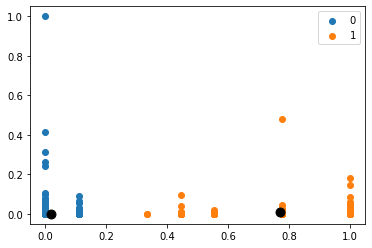

In [97]:
#Getting unique labels
 
u_labels = np.unique(labels)

#Getting the Centroids
centroids = kmeans.cluster_centers_
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(scaled_data[labels == i , 0] , scaled_data[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
#lets map the clusters back to the dataset and take a look at the head of the data frame.
data['clusters'] = labels

In [ ]:
data.head(15)

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,clusters
0,8.0,532700,137,30,1
1,1.0,1635552,131,30,0
2,8.0,548300,114,30,1
3,2.0,12200,13,30,0
4,8.0,211700,75,30,1
5,1.0,53400,106,30,0
6,8.0,276700,134,30,1
7,1.0,75100,319,30,0
8,1.0,97350,265,30,0
9,2.0,900,9,30,0


In [ ]:
#average of all variables across each cluster

avg_data = data.groupby(['clusters'], as_index=False).mean()
avg_data

,clusters,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
0,0,1.178540,41619.094987,78.897537,109.788039
1,1,7.933333,228959.800000,239.272222,173.294444


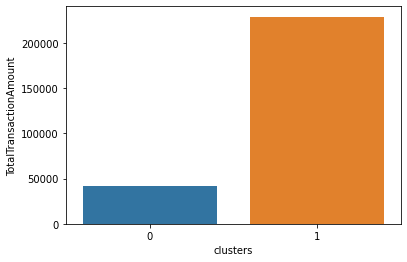

In [ ]:
sns.barplot(x='clusters',y='TotalTransactionAmount',data=avg_data)

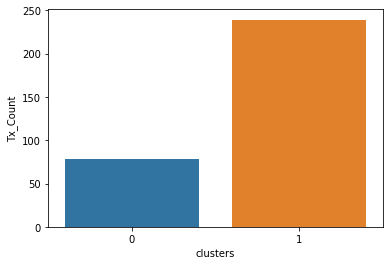

In [ ]:
sns.barplot(x='clusters',y='Tx_Count',data=avg_data)

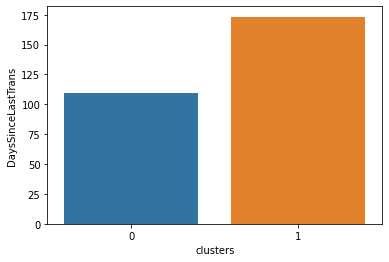

In [ ]:
sns.barplot(x='clusters',y='DaysSinceLastTrans',data=avg_data)

In [ ]:
df['clusters'] = labels

In [ ]:
df.head(10)

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category,clusters
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity,1
1,1287,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco,0
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity,1
3,1119,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco,0
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity,1
5,1119,1.0,53400,106,30,0.0,447.0,MTN,Airtime,Telco,0
6,1183,8.0,276700,134,30,1130.0,18.0,Jos Electric,Prepaid,Electricity,1
7,919,1.0,75100,319,30,0.0,447.0,Glo,Airtime,Telco,0
8,919,1.0,97350,265,30,0.0,447.0,MTN,Airtime,Telco,0
9,1437,2.0,900,9,30,0.0,447.0,Glo,Data,Telco,0


In [98]:
Product_ServiceProvider_df = pd.DataFrame(df.groupby(['clusters','Product_ServiceProvider'])['Product_ServiceProvider'].count())
Product_ServiceProvider_df

Product_ServiceProvider
clusters Product_ServiceProvider                         
0        9mobile                                      352
         Airtel                                       696
         Glo                                          417
         MTN                                          809
1        9mobile                                        3
         Airtel                                         4
         DSTV                                          12
         Eko Electric                                  33
         GOTV                                           9
         Glo                                            5
         Ibadan Electric                               13
         Ikeja Electric                                18
         Jamb                                          42
         Jos Electric                                  32
         MTN                                            4
         Portharcourt Electric                          3
         Startimes                                      2

In [99]:
Product_Type_df = pd.DataFrame(df.groupby(['clusters','Product_Type'])['Product_Type'].count())
Product_Type_df

Product_Type
clusters Product_Type              
0        Airtime               1876
         Data                   398
1        Airtime                  2
         E-facility              42
         Pay TV                  23
         Postpaid                28
         Prepaid                 71
         Voucher Pin             14

In [100]:
Product_Category_df = pd.DataFrame(df.groupby(['clusters','Product_Category'])['Product_Category'].count())
Product_Category_df

Product_Category
clusters Product_Category                  
0        Telco                         2274
1        Cable TV                        23
         Education                       42
         Electricity                     99
         Telco                            2
         Universal Pin                   14